In [2]:
import os
os.getcwd()

'c:\\Users\\magda\\Documents\\___HONEYWELL\\__HONEYWELL_DATA\\PROJEKT'

In [ ]:
import pandas as pd

df = pd.read_csv('finaldataset.csv')
print(df.columns)

# Replace 'column1', 'column2', ... with the actual names of the columns you want to include.

novy_df = df[['filename', 'spoofing', 'g_alt_msl', 'time', 'g_avg_cn0']]

# 3. Saving the new DataFrame to a CSV

novy_df.to_csv('finaldataset_regresni_analyza.csv', index=False)

novy_df

Index(['time', 'g_lat', 'g_lon', 'g_alt_msl', 'g_fix_type', 'g_itow',
       'g_pos_h_acc', 'g_pos_v_acc', 'g_vel_n', 'g_vel_e', 'g_vel_d',
       'g_rel_pos_n', 'g_rel_pos_n.1', 'g_rel_pos_n.2', 'g_vel_d.1',
       'g_avg_cn0', 'delta_lat', 'delta_lon', 'delta_alt', 'spoofing',
       'prev_spoofing', 'spoofing_start', 'spoofing_end', 'filename'],
      dtype='object')


,filename,spoofing,g_alt_msl,time,g_avg_cn0
0,1116 shidrug1_060827_test319.csv,False,63.308,0.069061,0
1,1116 shidrug1_060827_test319.csv,False,63.203,1.049095,40
2,1116 shidrug1_060827_test319.csv,False,63.224,2.049073,40
3,1116 shidrug1_060827_test319.csv,False,63.131,3.049224,40
4,1116 shidrug1_060827_test319.csv,False,63.098,4.049170,40
...,...,...,...,...,...
68335,20240820_IDFtest_Test188.csv,False,180.544,365.727766,38
68336,20240820_IDFtest_Test188.csv,False,180.794,366.727765,30
68337,20240820_IDFtest_Test188.csv,False,180.727,367.727790,26
68338,20240820_IDFtest_Test188.csv,False,180.410,368.727777,33


In [ ]:
# Dependent variable

y = df['spoofing']

# Independent variables (feature matrix), include altitude_diff and Cn0

X = df[['g_alt_msl', 'time', 'g_avg_cn0']]

# Checking the shape of X and y

print(X.shape, y.shape)

(68340, 3) (68340,)


In [ ]:
# sklearn.metrics is a module in the scikit-learn library (a Python library for machine learning), scikit is short for "SciPy toolkit," which is an extension package built on top of the SciPy library.
# It provides tools for evaluating model performance and computing various metrics for classification, regression, and clustering.
# model_selection is a module in scikit-learn (abbreviated as sklearn), containing functions for splitting data and evaluating machine learning models.

from sklearn.model_selection import train_test_split

y = df['spoofing']

X = df[['g_alt_msl', 'time', 'g_avg_cn0']]

# Splitting the data into training (train) and testing (test) sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output shape of the training and testing sets

print(f"Trénovací sada: {X_train.shape}, Testovací sada: {X_test.shape}")


Trénovací sada: (54672, 3), Testovací sada: (13668, 3)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Creating an instance of logistic regression

model = LogisticRegression()

# Training the model on the training data

model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

# For basic accuracy analysis, we will use methods like accuracy_score.
# Prediction on the test data:
# This will generate predictions for the test dataset (X_test) using the trained model.

y_pred = model.predict(X_test)

# For basic accuracy analysis, we will use methods like accuracy_score.
# Prediction on the test data:

accuracy = accuracy_score(y_test, y_pred)
print(f"Přesnost modelu: {accuracy * 100:.2f}%")


Přesnost modelu: 98.98%


In [ ]:
# The coefficients of the model tell us how much each independent variable affects the probability of spoofing.
# The coefficients in logistic regression are in the log-odds space, so their interpretation is based on how the log-odds of spoofing change when a particular variable changes.

# Accessing and printing the model coefficients:

print("Koeficienty:", model.coef_)
print("Intercept:", model.intercept_)


Koeficienty: [[ 0.00048305  0.00011285 -0.08462536]]
Intercept: [-3.41503686]


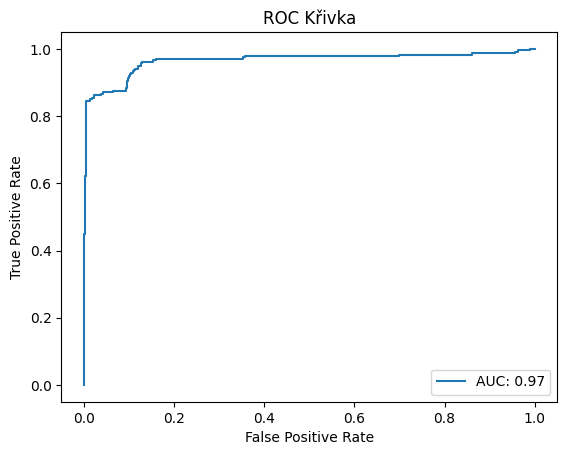

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# For better evaluation of the model, we can use the ROC curve (Receiver Operating Characteristic),
# which shows how well the model separates the classes.

y_prob = model.predict_proba(X_test)[:, 1]

# ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC: {roc_auc_score(y_test, y_prob):.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Křivka')
plt.legend()
plt.show()
